<a href="https://colab.research.google.com/github/plotsaf8/first/blob/main/athlete_%D0%91%D0%B5%D1%80%D0%B5%D0%B7%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [14]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

z = zipfile.ZipFile("/content/athlete_events.zip")
df = pd.read_csv(z.open("athlete_events.csv"))
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [15]:
df.shape

(30181, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [17]:
df.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [18]:
#Группируем данные по полу и медали, затем считаем количество призеров
medal_counts = df.groupby(['Sex', 'Medal']).size().unstack(fill_value=0)

print(medal_counts)

Medal  Bronze  Gold  Silver
Sex                        
F        3475  3437    3438
M        6673  6730    6428


**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [19]:
#Золотые медали
gold_medals = df[df['Medal'] == 'Gold']

#Группируем по стране и считаем количество золотых медалей
gold_counts = gold_medals['NOC'].value_counts()

#Находим страну с наибольшим количеством золотых медалей
most_gold_country = gold_counts.idxmax()
most_gold_count = gold_counts.max()

print(f"Страна с наибольшим количеством золотых медалей: {most_gold_country} ({most_gold_count} золотых медалей)")

Страна с наибольшим количеством золотых медалей: USA (2115 золотых медалей)


**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [20]:
gender_sport_distribution = pd.crosstab(df['Sport'], df['Sex'])

print(gender_sport_distribution)

Sex                           F     M
Sport                                
Alpine Skiing               180   174
Archery                     100   106
Art Competitions              0     2
Athletics                  1239  2409
Badminton                    73    81
Baseball                      0   333
Basketball                  390   610
Beach Volleyball             35    33
Biathlon                    147   241
Bobsleigh                    24   259
Boxing                       23   685
Canoeing                    271   770
Cross Country Skiing        316   371
Curling                      66    65
Cycling                     176   669
Diving                      161   157
Equestrianism               192   471
Fencing                     326   783
Figure Skating              125   124
Football                    301   783
Freestyle Skiing             51    51
Golf                          2     2
Gymnastics                  508   653
Handball                    421   516
Hockey      

**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [21]:
women_hockey = df[(df['Sex'] == 'F') & (df['Sport'] == 'Ice Hockey')]

#Вычисляем средний возраст и стандартное отклонение
mean_age = women_hockey['Age'].mean()
std_age = women_hockey['Age'].std()

print(f"Средний возраст женщин, участвовавших в хоккее на льду: {mean_age:.2f} лет")
print(f"Стандартное отклонение возраста: {std_age:.2f} лет")

Средний возраст женщин, участвовавших в хоккее на льду: 24.42 лет
Стандартное отклонение возраста: 4.36 лет


**5. У какой страны больше всего было больше всего женщин, получивших бронзовую медаль?**

In [22]:
women_bronze = df[(df['Sex'] == 'F') & (df['Medal'] == 'Bronze')]

country_counts = women_bronze['NOC'].value_counts()

most_bronze_women_country = country_counts.idxmax()
most_bronze_women_count = country_counts.max()

print(f"Страна с наибольшим количеством женщин, получивших бронзовую медаль: {most_bronze_women_country} ({most_bronze_women_count} женщин)")

Страна с наибольшим количеством женщин, получивших бронзовую медаль: USA (372 женщин)


**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

<Axes: xlabel='NOC'>

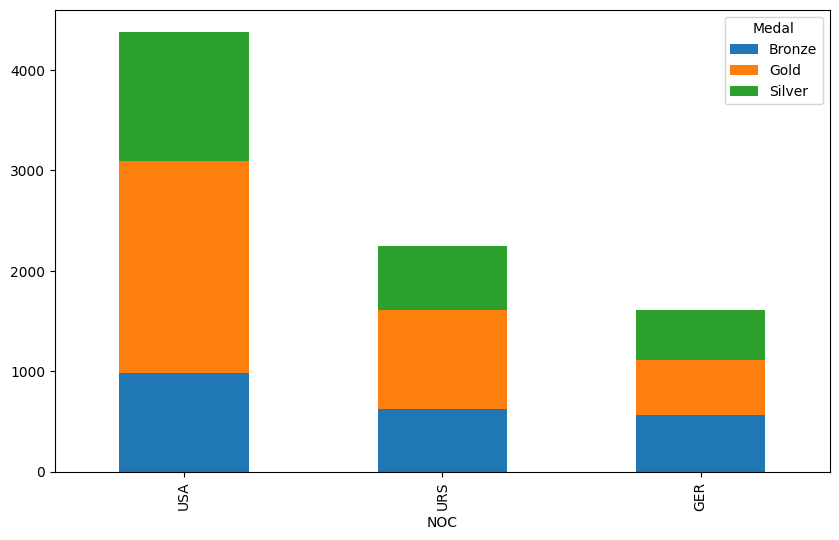

In [23]:
medal_counts = df.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)

top_countries = medal_counts.sum(axis=1).nlargest(3).index

top_medals = medal_counts.loc[top_countries]

top_medals.plot(kind='bar', stacked=True, figsize=(10, 6))

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

<Axes: xlabel='Weight', ylabel='Count'>

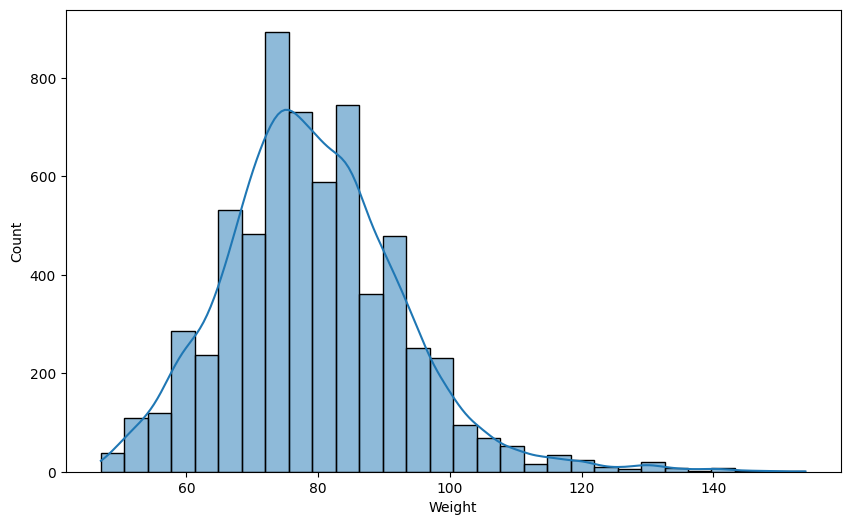

In [24]:
silver_men = df[(df['Medal'] == 'Silver') & (df['Sex'] == 'M')]

plt.figure(figsize=(10, 6))

sns.histplot(silver_men['Weight'], bins=30, kde=True)

**8. Постройте boxplot для возраста участника в зависимости от медали**

Text(0, 0.5, 'Возраст')

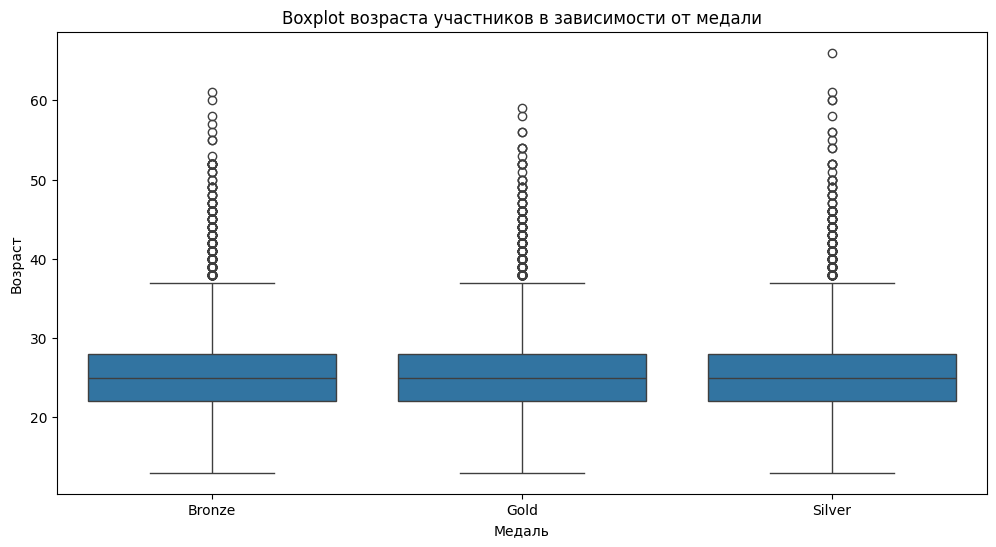

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medal', y='Age', data=df)

plt.title('Boxplot возраста участников в зависимости от медали')
plt.xlabel('Медаль')
plt.ylabel('Возраст')

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

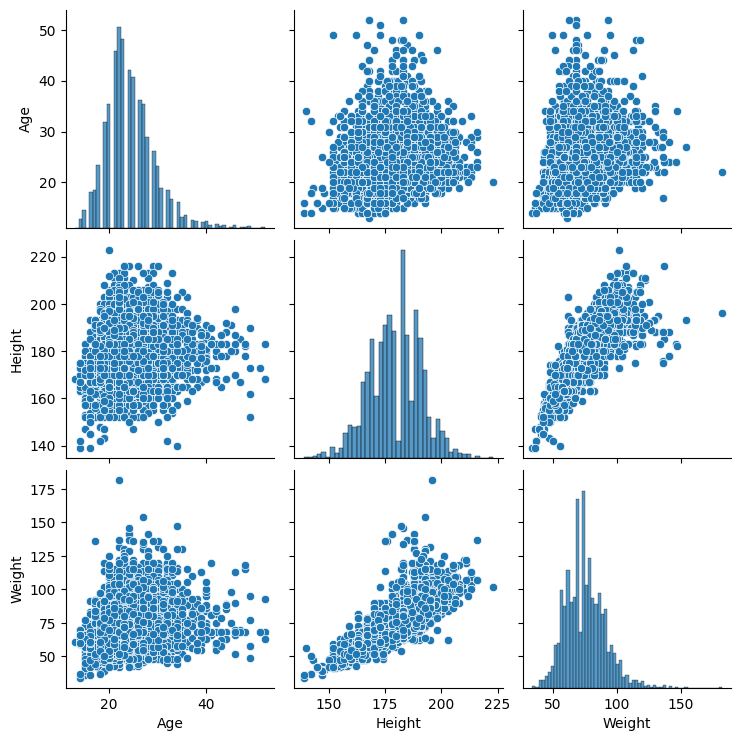

In [26]:
df_usa = df[df['NOC'] == 'USA']

sns.pairplot(df_usa[['Age', 'Height', 'Weight']])